# Introduction

Perkenalkan kami dari kelompok 3 kelas KS08 program Python for Data Science Kampus Merdeka x Hacktiv8. Sebelum masuk ke materi izinkan kami memperkenalkan kelompok kami terlebih dahulu :

1. Fasal Alif Haikal Irawan
2. Diki Dwi Aji
3. Mely Sekhan

Pada final project kali ini kami memilih untuk menggunakan dataset *Credit card* yang sudah disediakan oleh kode.id untuk ***mengelompokkan Class yang akan diberikan bank pada nasabah-nya*** yang ada didalam dataset tersebut. Terdapat *8950 rows* dan *18 columns* didalam dataset tersebut.

Informasi tentang atribut yang ada dalam dataset tersebut sebagai berikut ini :
1. custid - Identifikasi pemegang Kartu Kredit
2. balance - Saldo jumlah yang tersisa di akun untuk melakukan pembelian
3. balancefrequency - Seberapa sering Saldo diperbarui **(1 = frequently updated, 0 = not frequently updated)**
4. purchases - Jumlah pembelian yang dilakukan dari akun
5. oneoffpurchases - Jumlah pembelian maksimum dilakukan dalam sekali jalan
6. installmentspurchases - Jumlah pembelian dilakukan secara cicilan
7. cashadvance - Uang muka diberikan oleh pengguna
8. purchasesfrequency - Seberapa sering Pembelian dilakukan **(1 = frequently updated, 0 = not frequently updated)**
9. oneoffpurchasesfrequency - Seberapa sering Pembelian terjadi sekaligus **(1 = frequently updated, 0 = not frequently updated)**
10. purchasesinstallmentsfrequency - Frekuensi Pembelian Angsuran **(1 = frequently updated, 0 = not frequently updated)**
11. cashadvancefrequency - Seberapa sering uang muka dibayarkan
12. cashadvanceTRX - Jumlah Transaksi yang dilakukan dengan "Cash in Advance/Bayar dimuka"
13. purchasesTRX - Jumlah transaksi pembelian yang dilakukan
14. creditlimit - Limit Kartu Kredit untuk pengguna
15. payments - Jumlah Pembayaran yang dilakukan oleh pengguna
16. minimum_payments - Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. PRCfullpayment - Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. tenure - Jangka waktu layanan kartu kredit untuk pengguna

# Import Library

Tahap awal selalu diawali dengan import library yang kita butuhkan untuk keperluan proses data heart_failure

In [1]:
# Main Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Model Library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Loading

Setelah import library kita akan melihat secara sekilas tentang dataset Credit Card

In [2]:
df_creditCard = pd.read_csv("CC GENERAL.csv")

In [3]:
df_creditCard

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Data Cleaning

Pada tahap ini, kita akan melihat apakah data credit card memiliki missing_value, data yang diduplikasi atau memiliki korelasi antara kolom satu dengan yang lainnya. hal ini diperlukan untuk memastikan saat membuat model nanti dan memberi latihan pada model, model tidak kebingungan dengan data yang missing atau duplikat atau korelasi.

In [4]:
df_creditCard.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df_creditCard['MINIMUM_PAYMENTS'].fillna(df_creditCard['MINIMUM_PAYMENTS'].mean(), inplace=True)

Kita akan **mengubah data null** yang ada pada kolom *MINIMUM_PAYMENTS* dengan nilai median dari kolom tersebut.

In [6]:
df_creditCard.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Data null pada CREDIT_LIMIT **hanya terdapat satu data kosong**, maka akan kita akan hapus satu kolom tersebut.

In [7]:
df_creditCard.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df_creditCard.drop(['CUST_ID', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'PAYMENTS', 'MINIMUM_PAYMENTS'], axis=1, inplace=True)

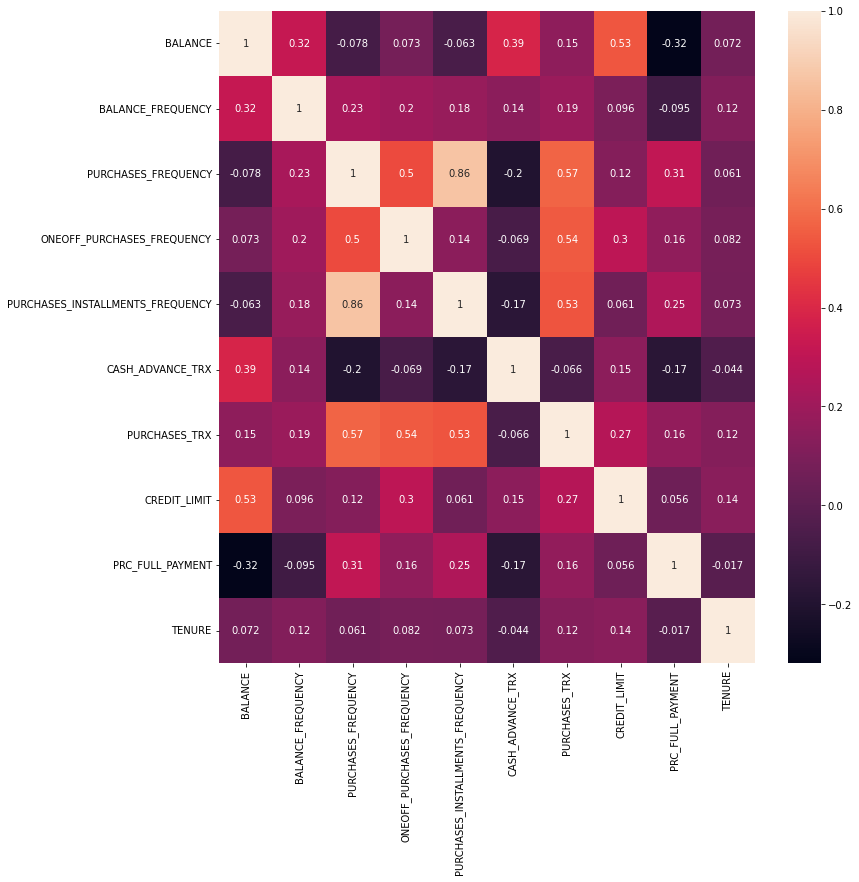

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df_creditCard.corr(), annot=True)
plt.show()

In [10]:
df_creditCard.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.166667,0.000000,0.083333,0,2,1000.0,0.000000,12
1,3202.467416,0.909091,0.000000,0.000000,0.000000,4,0,7000.0,0.222222,12
2,2495.148862,1.000000,1.000000,1.000000,0.000000,0,12,7500.0,0.000000,12
3,1666.670542,0.636364,0.083333,0.083333,0.000000,1,1,7500.0,0.000000,12
4,817.714335,1.000000,0.083333,0.083333,0.000000,0,1,1200.0,0.000000,12


In [11]:
df_creditCard.BALANCE.max()

19043.13856

Seperti yang kita lihat tidak ada missing value, data tidak memiliki korelasi dengan kolom lain, dan tidak ada data yang duplikat berarti data Credit Card aman untuk kita eksplorasi data-nya.

# Exploration Data

Kita akan mulai tahap selanjutnya, yaitu mengekplorasi data dari Credit card untuk mendapatkan insight tentang data tersebut.

In [12]:
df_creditCard.shape

(8949, 10)

In [13]:
df_creditCard.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [14]:
df_creditCard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES_FREQUENCY               8949 non-null   float64
 3   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 4   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 5   CASH_ADVANCE_TRX                  8949 non-null   int64  
 6   PURCHASES_TRX                     8949 non-null   int64  
 7   CREDIT_LIMIT                      8949 non-null   float64
 8   PRC_FULL_PAYMENT                  8949 non-null   float64
 9   TENURE                            8949 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 769.1 KB


In [15]:
df_creditCard['TENURE'].value_counts()

12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: TENURE, dtype: int64

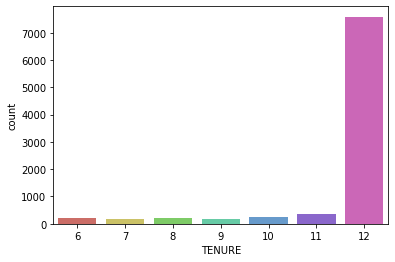

In [16]:
sns.countplot(x='TENURE', data=df_creditCard, palette='hls')
plt.show()

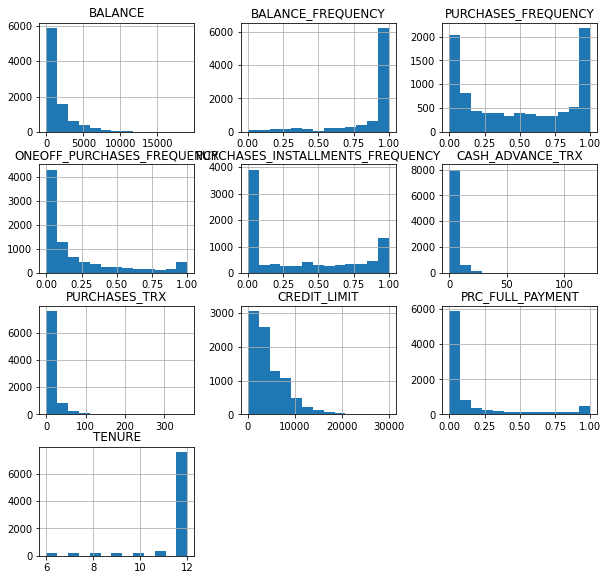

In [17]:
df_creditCard.hist(bins=13, figsize=(10,15), layout=(6,3));

Visualisasi diatas berisi seluruh data yang ada pada dataset Credit card dengan menggunakan Histogram

# Data Preprocessing

## Normalisasi data

Normalisasi pada dataset memiliki fungsi **agar nilai data menjadi seimbang**, karena jika terdapat nilai yang terlalu besar akan memiliki dampak pada proses pengolahan data.

In [18]:
mm_scaler = MinMaxScaler()  
x = mm_scaler.fit_transform(df_creditCard)
x[: 5]

array([[0.00214779, 0.818182  , 0.166667  , 0.        , 0.083333  ,
        0.        , 0.00558659, 0.03171953, 0.        , 1.        ],
       [0.1681691 , 0.909091  , 0.        , 0.        , 0.        ,
        0.03252033, 0.        , 0.23205342, 0.222222  , 1.        ],
       [0.13102614, 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.03351955, 0.24874791, 0.        , 1.        ],
       [0.08752079, 0.636364  , 0.083333  , 0.083333  , 0.        ,
        0.00813008, 0.0027933 , 0.24874791, 0.        , 1.        ],
       [0.0429401 , 1.        , 0.083333  , 0.083333  , 0.        ,
        0.        , 0.0027933 , 0.03839733, 0.        , 1.        ]])

# Model Defining

Selanjutnya kita akan mengurangi dimensi dengan membentuk variabel-variabel baru yang disebut Principal Components dengan dataset yang sudah dinormalisasi

In [19]:
pca = PCA(n_components=3)
components = pca.fit_transform(x)
pca_data = pd.DataFrame(data=components,
                        columns=['Component 1', 'Component 2', 'Component 3'])

In [20]:
print(pca.explained_variance_ratio_)

print("Total informasi dari 3 Component= ", sum(pca.explained_variance_ratio_))

[0.51448441 0.14560735 0.13249986]
Total informasi dari 3 Component=  0.7925916214865141


Metode diatas digunakan untuk mendapatkan rasio varians. Jadi pada 

**PCA 1** itu memiliki nilai varians sebanyak **51% dari 100%**, dan 

**PCA 2** memiliki nilai **14% dari 100%**. 

**PCA 3** memiliki nilai **13% dari 100%**. 

*Sehingga jika di jumlahkan ketiga-nya* memiliki sekitar **79% dari 100%**.

In [21]:
pca_data.head()

,Component 1,Component 2,Component 3
0,-0.489748,-0.090449,-0.063628
1,-0.602790,-0.022927,0.092069
2,0.299511,0.933222,-0.045580
3,-0.594255,-0.001343,0.020187
4,-0.561836,0.057839,-0.106746


Kita dapat melihat detail data-nya dengan mengakses *pca_data*

Sekarang kita telah mengurangi atribut menjadi 3 dimensi, kita akan melakukan pengelompokan dengan **elbow method**

Langkah-langkah yang dilakukan dalam Clustering

* Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk
* Memeriksa cluster yang terbentuk melalui scatter plot

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:


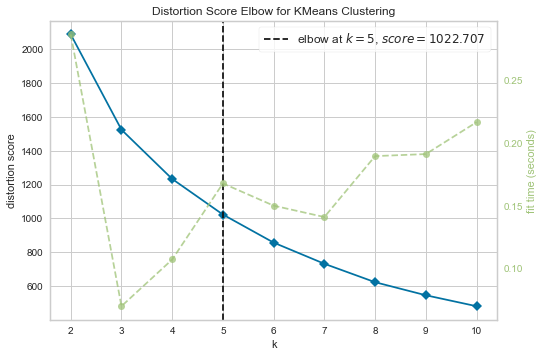

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer

# Quick examination of elbow method to find numbers of clusters to make.
print('Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:')
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(pca_data)
Elb.show()

Berdasarkan visualisasi elbow method, Nilai K paling optimal adalah 5. Dengan begitu, jumlah cluster terbentuk sebanyak 5

# Model Training 

In [23]:
# Mendefinisikan model kmeans dengan jumlah klaster sebanyak 5
kmeans = KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='lloyd', max_iter=300)

In [24]:
kmeans.fit(x)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(5, 10)

In [25]:
y_kmeans= kmeans.fit_predict(pca_data)

labels = kmeans.labels_

cluster = kmeans.cluster_centers_
centroids = np.array(cluster)


df_creditCard['Class'] = labels; pca_data['Class'] = labels

In [44]:
pca_data

,Component 1,Component 2,Component 3,Class
0,0.535094,-0.206140,-0.034588,3
1,0.255449,0.038917,-0.127155,1
2,0.499791,-0.107606,0.185940,3
3,0.806278,-0.448018,0.053091,3
4,0.235889,-0.038600,0.168433,1
...,...,...,...,...
173,-0.522409,-0.601838,0.224329,2
174,-0.346650,-0.404122,0.062981,2
175,-0.401993,-0.613964,0.032394,2
176,-0.285689,-0.442682,-0.156043,2


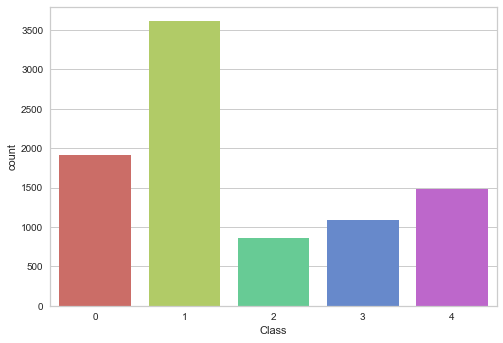

In [26]:
sns.countplot(x='Class', data=df_creditCard, palette='hls')
plt.show()

# Model Evaluation

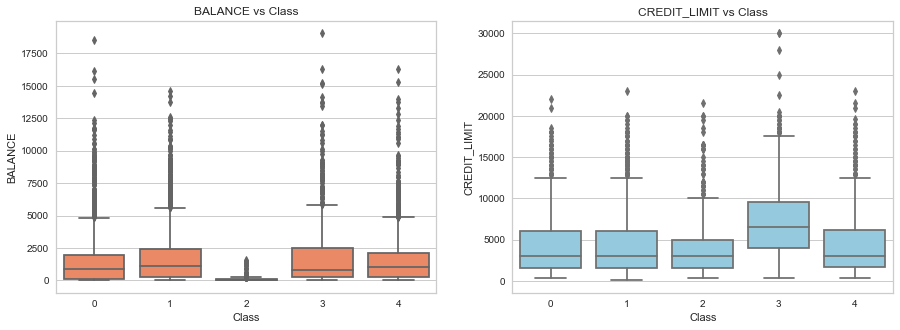

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'BALANCE', data  = df_creditCard, color = 'coral');
plt.title('BALANCE vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'CREDIT_LIMIT', data  = df_creditCard, color = 'skyblue');
plt.title('CREDIT_LIMIT vs Class')

plt.show()

Perbandingan antara balance vs class dan credit_limit vs class, menghasilkan informasi bahwa semakin tinggi balance suatu class, maka credit_limit juga akan semakin tinggi juga.

Sehingga kesimpulannya adalah

* kelas 0, limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo

* kelas 1, limit kredit pengguna rendah  & Pengguna  jarang memperbaharui isi saldo

* kelas 2, limit kredit pengguna rata-rata & Pengguna cukup sering memperbaharui isi saldo

* kelas 3, limit kredit pengguna tinggi & Pengguna sering memperbaharui isi saldo

* kelas 4, limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo

In [28]:
import pickle
pickle.dump(kmeans, open('./model/model_FP4.pkl', 'wb'))
print("Model Berhasil di Export!")

Model Berhasil di Export!


In [29]:
k_means_model = pickle.load(open("./model/model_FP4.pkl", "rb"))
print("Model Berhasil di import!")

Model Berhasil di import!


# Model Inference

Selanjutnya akan kita coba model yang sudah kita buat dengan dataset lain. disini kita memakai dataset diabetes untuk percobaan-nya.

## Data loading 

In [30]:
data = pd.read_csv('wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Data cleaning

In [31]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [32]:
data.drop(['OD280', 'Ash_Alcanity', 'Nonflavanoid_Phenols'], axis=1, inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic_Acid       178 non-null    float64
 2   Ash              178 non-null    float64
 3   Magnesium        178 non-null    int64  
 4   Total_Phenols    178 non-null    float64
 5   Flavanoids       178 non-null    float64
 6   Proanthocyanins  178 non-null    float64
 7   Color_Intensity  178 non-null    float64
 8   Hue              178 non-null    float64
 9   Proline          178 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 14.0 KB


In [34]:
data.shape

(178, 10)

In [35]:
data.isna().sum()

Alcohol            0
Malic_Acid         0
Ash                0
Magnesium          0
Total_Phenols      0
Flavanoids         0
Proanthocyanins    0
Color_Intensity    0
Hue                0
Proline            0
dtype: int64

In [36]:
data.duplicated().sum()

0

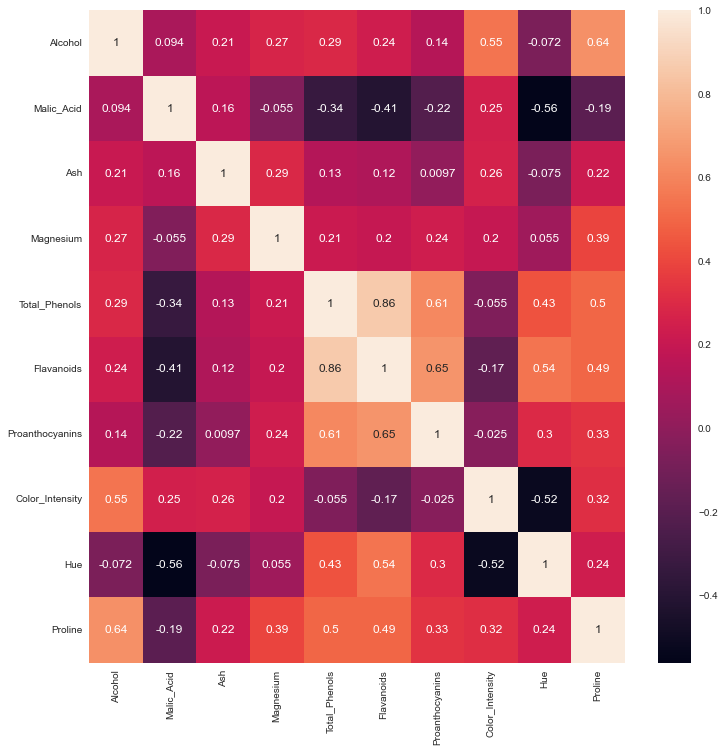

In [37]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

Dataset sudah clean jadi tidak perlu kita drop atau ubah kolomnya.

## Data preprocessing

In [38]:
# Normalisasi data
mm_scaler = MinMaxScaler()  
x = mm_scaler.fit_transform(data)
x[: 5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.61956522, 0.62758621,
        0.57383966, 0.59305994, 0.37201365, 0.45528455, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.32608696, 0.57586207,
        0.51054852, 0.27444795, 0.26450512, 0.46341463, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.33695652, 0.62758621,
        0.61181435, 0.75709779, 0.37542662, 0.44715447, 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.4673913 , 0.98965517,
        0.66455696, 0.55835962, 0.55631399, 0.30894309, 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.52173913, 0.62758621,
        0.49578059, 0.44479495, 0.25938567, 0.45528455, 0.32596291]])

In [39]:
pca = PCA(n_components=3)
components = pca.fit_transform(x)
pca_data = pd.DataFrame(data=components,
                        columns=['Component 1', 'Component 2', 'Component 3'])

In [40]:
print(pca.explained_variance_ratio_)

print("Total informasi dari 3 Component= ", sum(pca.explained_variance_ratio_))

[0.38932977 0.24669993 0.09496145]
Total informasi dari 3 Component=  0.7309911563480213


## Model training

In [41]:
y_kmeans= k_means_model.fit_predict(pca_data)

labels = k_means_model.labels_

cluster = k_means_model.cluster_centers_
centroids = np.array(cluster)


data['Class'] = labels; pca_data['Class'] = labels

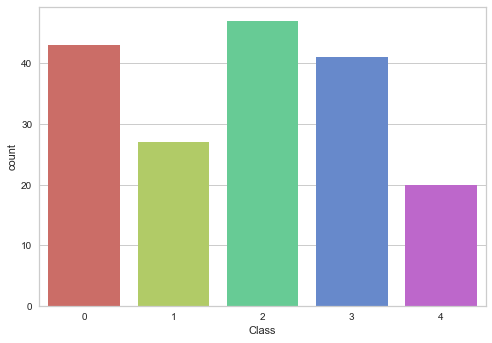

In [42]:
sns.countplot(x='Class', data=data, palette='hls')
plt.show()

## Model evaluation

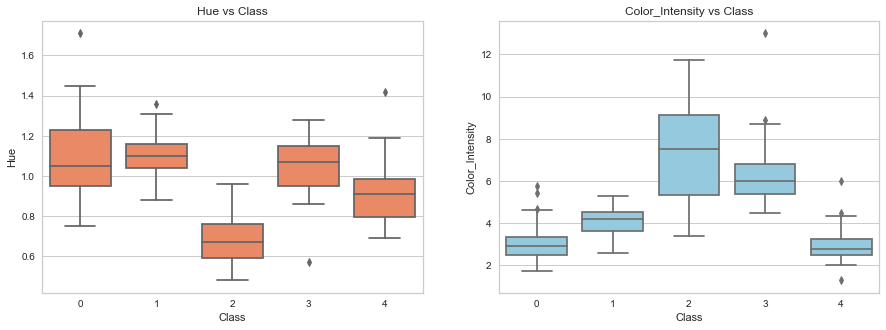

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'Hue', data  = data, color = 'coral');
plt.title('Hue vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'Color_Intensity', data  = data, color = 'skyblue');
plt.title('Color_Intensity vs Class')

plt.show()

# Conclusion

Berdasarkan hasil dari analisis keseluruhan, dapat disimpulkan bahwa :

1. Project ini membahas tentang mengimplementasikan algoritma Unsupervised Learning. Metode yang digunakan untuk menyelesaikan permasalahannya adalah *Principal Component Analysis (PCA) dan K-Means*.

2. Untuk mencari nilai optimal dalam menentukan jumlah clustering, maka digunakan teknik ELBOW METHOD.

3. Diperoleh jumlah Cluster paling optimal, yaitu 5.

4. Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan berdasarkan 5 Clustering, dimana kelima cluster tersebut memiliki kriteria yang berbeda. Yaitu :

    * kelas 0, limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo

    * kelas 1, limit kredit pengguna rendah  & Pengguna  jarang memperbaharui isi saldo

    * kelas 2, limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo

    * kelas 3, limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo

    * kelas 4, limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo